<center><h1>Schmidt_Matteus_HW6</h1></center>
<br>
<center><font size="4"> 

**Name:** Matteus Schmidt

**GitHub:** MatteusSchmidt

**USCID:** 3780947272

</font></center>

---

## 1. Tree-Based Methods

Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sci
import statsmodels.api as sm
import scipy

from xgboost import XGBClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE

In [ ]:
# Note: Jupyter env on Python 3.12

# %pip install -r ../requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00a 0:00:01


### (a) Download the APS Failure data

In [4]:
test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20)
train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20)

In [7]:
### sanity checks

print('test cols:', list(test.columns))
print('train cols:', list(train.columns))
print('train cols = test cols:', bool(list(test.columns) == list(train.columns)))
print('len train:', len(train))
print('len test:',len(test))
print('ordered list col null values count (prior to transformation):', list(train.isnull().sum()))

test cols: ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', '

In [5]:
train = train.replace({'na': np.nan, 'neg': '0', 'pos': '1'})
train = train.apply(pd.to_numeric)

test = test.replace({'na': np.nan, 'neg': '0', 'pos': '1'})
test = test.apply(pd.to_numeric)

null_list = list(train.isnull().sum())
print('ordered list col null values count:', null_list, '\n')
print('post transform num negative (train):', len(train[train['class'] == 0]))
print('post transform num positive (train):', len(train[train['class'] == 1]))
print('\ndata is now transformed to be modeled as according to the data description.\n\nClass:\n\tnegative == 0,\n\tpositive == 1')

ordered list col null values count: [0, 0, 46329, 3335, 14861, 2500, 2500, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 645, 629, 629, 4400, 642, 629, 642, 589, 642, 589, 2723, 629, 629, 629, 2500, 2501, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 688, 688, 688, 688, 688, 688, 688, 688, 688, 688, 645, 2725, 2727, 2503, 2500, 642, 642, 589, 589, 23034, 27277, 39549, 44009, 46333, 47740, 48722, 49264, 726, 167, 691, 691, 3257, 473, 2723, 4356, 726, 3255, 676, 2502, 14861, 14861, 14861, 338, 338, 338, 9553, 9877, 687, 687, 687, 687, 687, 687, 687, 687, 687, 687, 14861, 2724, 691, 46329, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 13808, 13808, 13808, 13808, 13808, 13808, 13808, 13808, 13808, 2503, 2724, 4008, 4008, 4008, 4006, 4007, 4007, 4008, 4009, 691, 2724, 2726, 2726, 2726, 2727, 2727, 2726, 2726, 2723, 2724, 2723, 2723, 4007, 10239, 9553, 671, 671, 671, 671, 671, 671, 671, 671, 671, 671, 2724, 2723] 

post transform 

In [6]:
for i in range(len(null_list)):
    null_list[i] = round(null_list[i] / len(train), 4)

print('ordered list col null values percentage:', null_list, '\n')


ordered list col null values percentage: [0.0, 0.0, 0.7722, 0.0556, 0.2477, 0.0417, 0.0417, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0107, 0.0105, 0.0105, 0.0733, 0.0107, 0.0105, 0.0107, 0.0098, 0.0107, 0.0098, 0.0454, 0.0105, 0.0105, 0.0105, 0.0417, 0.0417, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0107, 0.0454, 0.0454, 0.0417, 0.0417, 0.0107, 0.0107, 0.0098, 0.0098, 0.3839, 0.4546, 0.6592, 0.7335, 0.7722, 0.7957, 0.812, 0.8211, 0.0121, 0.0028, 0.0115, 0.0115, 0.0543, 0.0079, 0.0454, 0.0726, 0.0121, 0.0542, 0.0113, 0.0417, 0.2477, 0.2477, 0.2477, 0.0056, 0.0056, 0.0056, 0.1592, 0.1646, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.0115, 0.2477, 0.0454, 0.0115, 0.7722, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.0112, 0.011

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

In [7]:
five = 0
five_to_20 = 0
over_20 = 0
for item in null_list:
    if item < 0.05 and item != 0: five+=1
    elif item >= 0.05 and item <0.2: five_to_20+=1
    elif item >= 0.2: over_20+=1

print('Proportion of missing values:\n\tnum features (x) where 0<x<5% null values:', five)
print('\tnum features (x) where 5<x<20% null values:', five_to_20)
print('\tnum features (x) where >=20% null values:', over_20)

Proportion of missing values:
	num features (x) where 0<x<5% null values: 127
	num features (x) where 5<x<20% null values: 18
	num features (x) where >=20% null values: 24


First of all, I must not impute data in which is structually missing. It would not make sense to populate missing data where it should by nature be missing. However, I could not find a suitable method to test for this as we do not know the feature set.

Because of the nature of the feature set, and the obfuscation of true variable meaning, we will not attempt to determine whether the missing values are Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR). In practice, distinguishing between MAR and MNAR is impossible without knowledge of the feature set or an equal external dataset for reference. Therefore, I will assume that missing data is not dependent on other missing data, or that there are no MNAR features.

For MCAR features:
- with missing values below 10%, it is common to use mean and median for quantitative features. Normally distributed samples should use mean, and skewed sample distributions should use median. 
- with missing values above 10% (inclusive), it is common to use random sampling imputation, where one randomly assigns another value in the feature list to the missing value. This inherently preserves the sample distribution, and it may be better to test and assume a probability distribution then randomly sample from said distribution.

For MAR features:
- with missing values at any percent, I would use scikit-learn's iterative imputer (Regression imputation), which imputes the missing value as a random sample from a normal distribution centered at the predicted value with residual's variance which represents noise. I would then do this multiple times with random subsamples of the training set to pool the estimates to create unbias semi-random estimates of missing values to simulate Multiple Imputation. (One could use KNN imputation with class separation, yet 170 features is far too many for distance metrics to be reliable, and there are many missing values across classes, making distance metrics moot for feature-sparse observations).
    - this may be computationally expensive, but it is the least bias way of generating interpretable values for the dataset which can be modeled

For MNAR features:
- The only way one could reduce bias for MNAR features is to create binary indicators for all missing/non-missing values per feature. You would then run multiple imputing or simulate it like I will to then populate the missing values based on predictions from these binary indicators. It does not however unbias estimations of missing values, but would be optimal for the constraints of this dataset.

Assumptions from this approach include: PDFs / DF per feature with missing values, all MAR features are not also MNAR.

In [8]:
print('observations w/o null values:', len(train.dropna()))
print('neg observations w/o null values:', len(train.dropna()[train.dropna()['class'] == 0]))
print('pos observations w/o null values:', len(train.dropna()[train.dropna()['class'] == 1]))

observations w/o null values: 591
neg observations w/o null values: 515
pos observations w/o null values: 76


In [9]:
imputed_train = pd.DataFrame()
imputed_test = pd.DataFrame()

np.random.seed(42)

# MCAR list
is_MCAR = []
for i in train.columns:
    ind = True
    for col in train.columns:
        if col == i or train[col].isnull().all() or col == 'class': continue
        try:
            t_test, p = ttest_ind(train[train[i].notnull()][col], train[train[i].isnull()][col], nan_policy='omit', equal_var=False)
            if p < 0.05: 
                ind = False
                break
        except:
            continue
    is_MCAR.append(ind)

MAR = []
for i, col in enumerate(train.columns):
    if col == 'class':
        imputed_train[col] = train[col]
        imputed_test[col] = test[col]
        continue

    if is_MCAR[i] and null_list[i] > 0.1: # random fill
        obs = train[col].dropna().values
        train_index = train[col].isnull()
        test_index = test[col].isnull()
        train_imputed = np.random.choice(obs, size=train_index.sum(), replace=True)
        test_imputed = np.random.choice(obs, size=test_index.sum(), replace=True)
        imputed_train[col] = train[col].copy()
        imputed_train.loc[train_index, col] = train_imputed
        imputed_test[col] = test[col].copy()
        imputed_test.loc[test_index, col] = test_imputed

    elif is_MCAR[i]: # mean or median fill based on sample dist
        try:
            stat, p = scipy.stats.shapiro(train[col].dropna())
        except:
            p = 0  # Force median

        if p > 0.1:
            val = train[col].mean()
        else:
            val = train[col].median()

        imputed_train[col] = train[col].fillna(val)
        imputed_test[col] = test[col].fillna(val)

    else:
        MAR.append(col)

# MAR/MNAR fill with iterative imputer and MICE similar pooling
imputed_train[MAR] = train[MAR]
imputed_test[MAR] = test[MAR]

imputer = IterativeImputer(estimator=BayesianRidge(), sample_posterior=True, max_iter=5)
imputed_datasets_train = []
imputed_datasets_test = []

features_train = imputed_train[MAR]
features_test = imputed_test[MAR]

for seed in range(3):
    imputer.random_state = seed
    imputer.fit(features_train)
    
    imputed_train_part = imputer.transform(features_train)
    imputed_test_part = imputer.transform(features_test)
    
    imputed_datasets_train.append(pd.DataFrame(imputed_train_part, columns=features_train.columns))
    imputed_datasets_test.append(pd.DataFrame(imputed_test_part, columns=features_test.columns))

# Pooling
mean_imputed_train = sum(imputed_datasets_train) / len(imputed_datasets_train)
mean_imputed_test = sum(imputed_datasets_test) / len(imputed_datasets_test)
imputed_train[MAR] = mean_imputed_train
imputed_test[MAR] = mean_imputed_test

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 60000.
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/gz/f7gl5mvd6ql5n5x86nqy51dr0000gn/T/ipykernel_67695/508541094.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is usua

#### (ii) Calculate the coefficient of variation

In [13]:
coef_var = {}

for col in train.columns:
    m = np.mean(train[col])
    s = np.std(train[col])
    coef_var[col] = s / m

for k, v in coef_var.items():
    if k == 'class': continue
    print(k + ':', round(v, 4))


aa_000: 2.4509
ab_000: 4.8779
ac_000: 2.2327
ad_000: 211.9601
ae_000: 23.6895
af_000: 19.0601
ag_000: 92.3959
ag_001: 35.0512
ag_002: 17.4669
ag_003: 8.5982
ag_004: 5.4319
ag_005: 2.9436
ag_006: 2.3581
ag_007: 2.8494
ag_008: 6.1892
ag_009: 33.1701
ah_000: 2.3126
ai_000: 18.1077
aj_000: 44.0329
ak_000: 77.4188
al_000: 9.1232
am_0: 9.1065
an_000: 2.2509
ao_000: 2.2713
ap_000: 3.0756
aq_000: 2.8536
ar_000: 11.0916
as_000: 86.8727
at_000: 23.5832
au_000: 68.5201
av_000: 5.903
ax_000: 3.961
ay_000: 37.2179
ay_001: 52.528
ay_002: 39.0281
ay_003: 28.5735
ay_004: 33.5626
ay_005: 12.4539
ay_006: 3.0401
ay_007: 3.3027
ay_008: 3.7969
ay_009: 84.2578
az_000: 9.3809
az_001: 7.6895
az_002: 13.2157
az_003: 7.4879
az_004: 2.833
az_005: 3.025
az_006: 8.8304
az_007: 16.1379
az_008: 22.552
az_009: 77.4014
ba_000: 2.6986
ba_001: 2.6238
ba_002: 2.8954
ba_003: 2.7318
ba_004: 2.6311
ba_005: 2.6954
ba_006: 3.0246
ba_007: 2.8266
ba_008: 6.7905
ba_009: 9.3753
bb_000: 2.4053
bc_000: 7.104
bd_000: 5.2432
be_000: 

#### (iii) Plot a correlation matrix

In [14]:
print(train.corr())

           class    aa_000    ab_000    ac_000    ad_000    ae_000    af_000  \
class   1.000000  0.536978  0.031896 -0.036533 -0.000415  0.008873  0.022532   
aa_000  0.536978  1.000000  0.073103 -0.032055 -0.001903  0.061971  0.089474   
ab_000  0.031896  0.073103  1.000000 -0.019411  0.047281  0.031031  0.053532   
ac_000 -0.036533 -0.032055 -0.019411  1.000000 -0.002380 -0.004997 -0.010554   
ad_000 -0.000415 -0.001903  0.047281 -0.002380  1.000000 -0.000214 -0.000269   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.160580  0.606232  0.023867 -0.029417 -0.000829  0.052357  0.070306   
ee_008  0.235880  0.471707  0.039369  0.016908 -0.002161 -0.010850 -0.013976   
ee_009  0.116099  0.248039  0.074119  0.024354 -0.001050 -0.008206 -0.010237   
ef_000  0.018400  0.019865  0.055590 -0.006571 -0.000102  0.070886  0.106281   
eg_000  0.017526  0.037099  0.162948  0.014228 -0.000120  0.041715  0.060710   

          ag_000    ag_001    ag_002  .

#### (iv) Make scatter plots and box plots

In [15]:
sorted_cv = dict(sorted(coef_var.items(), key=lambda item: item[1], reverse=True))
cv_features = []

for i in range(int(round(np.sqrt(170), 0))):
    cv_features.append(list(sorted_cv.items())[i][0])

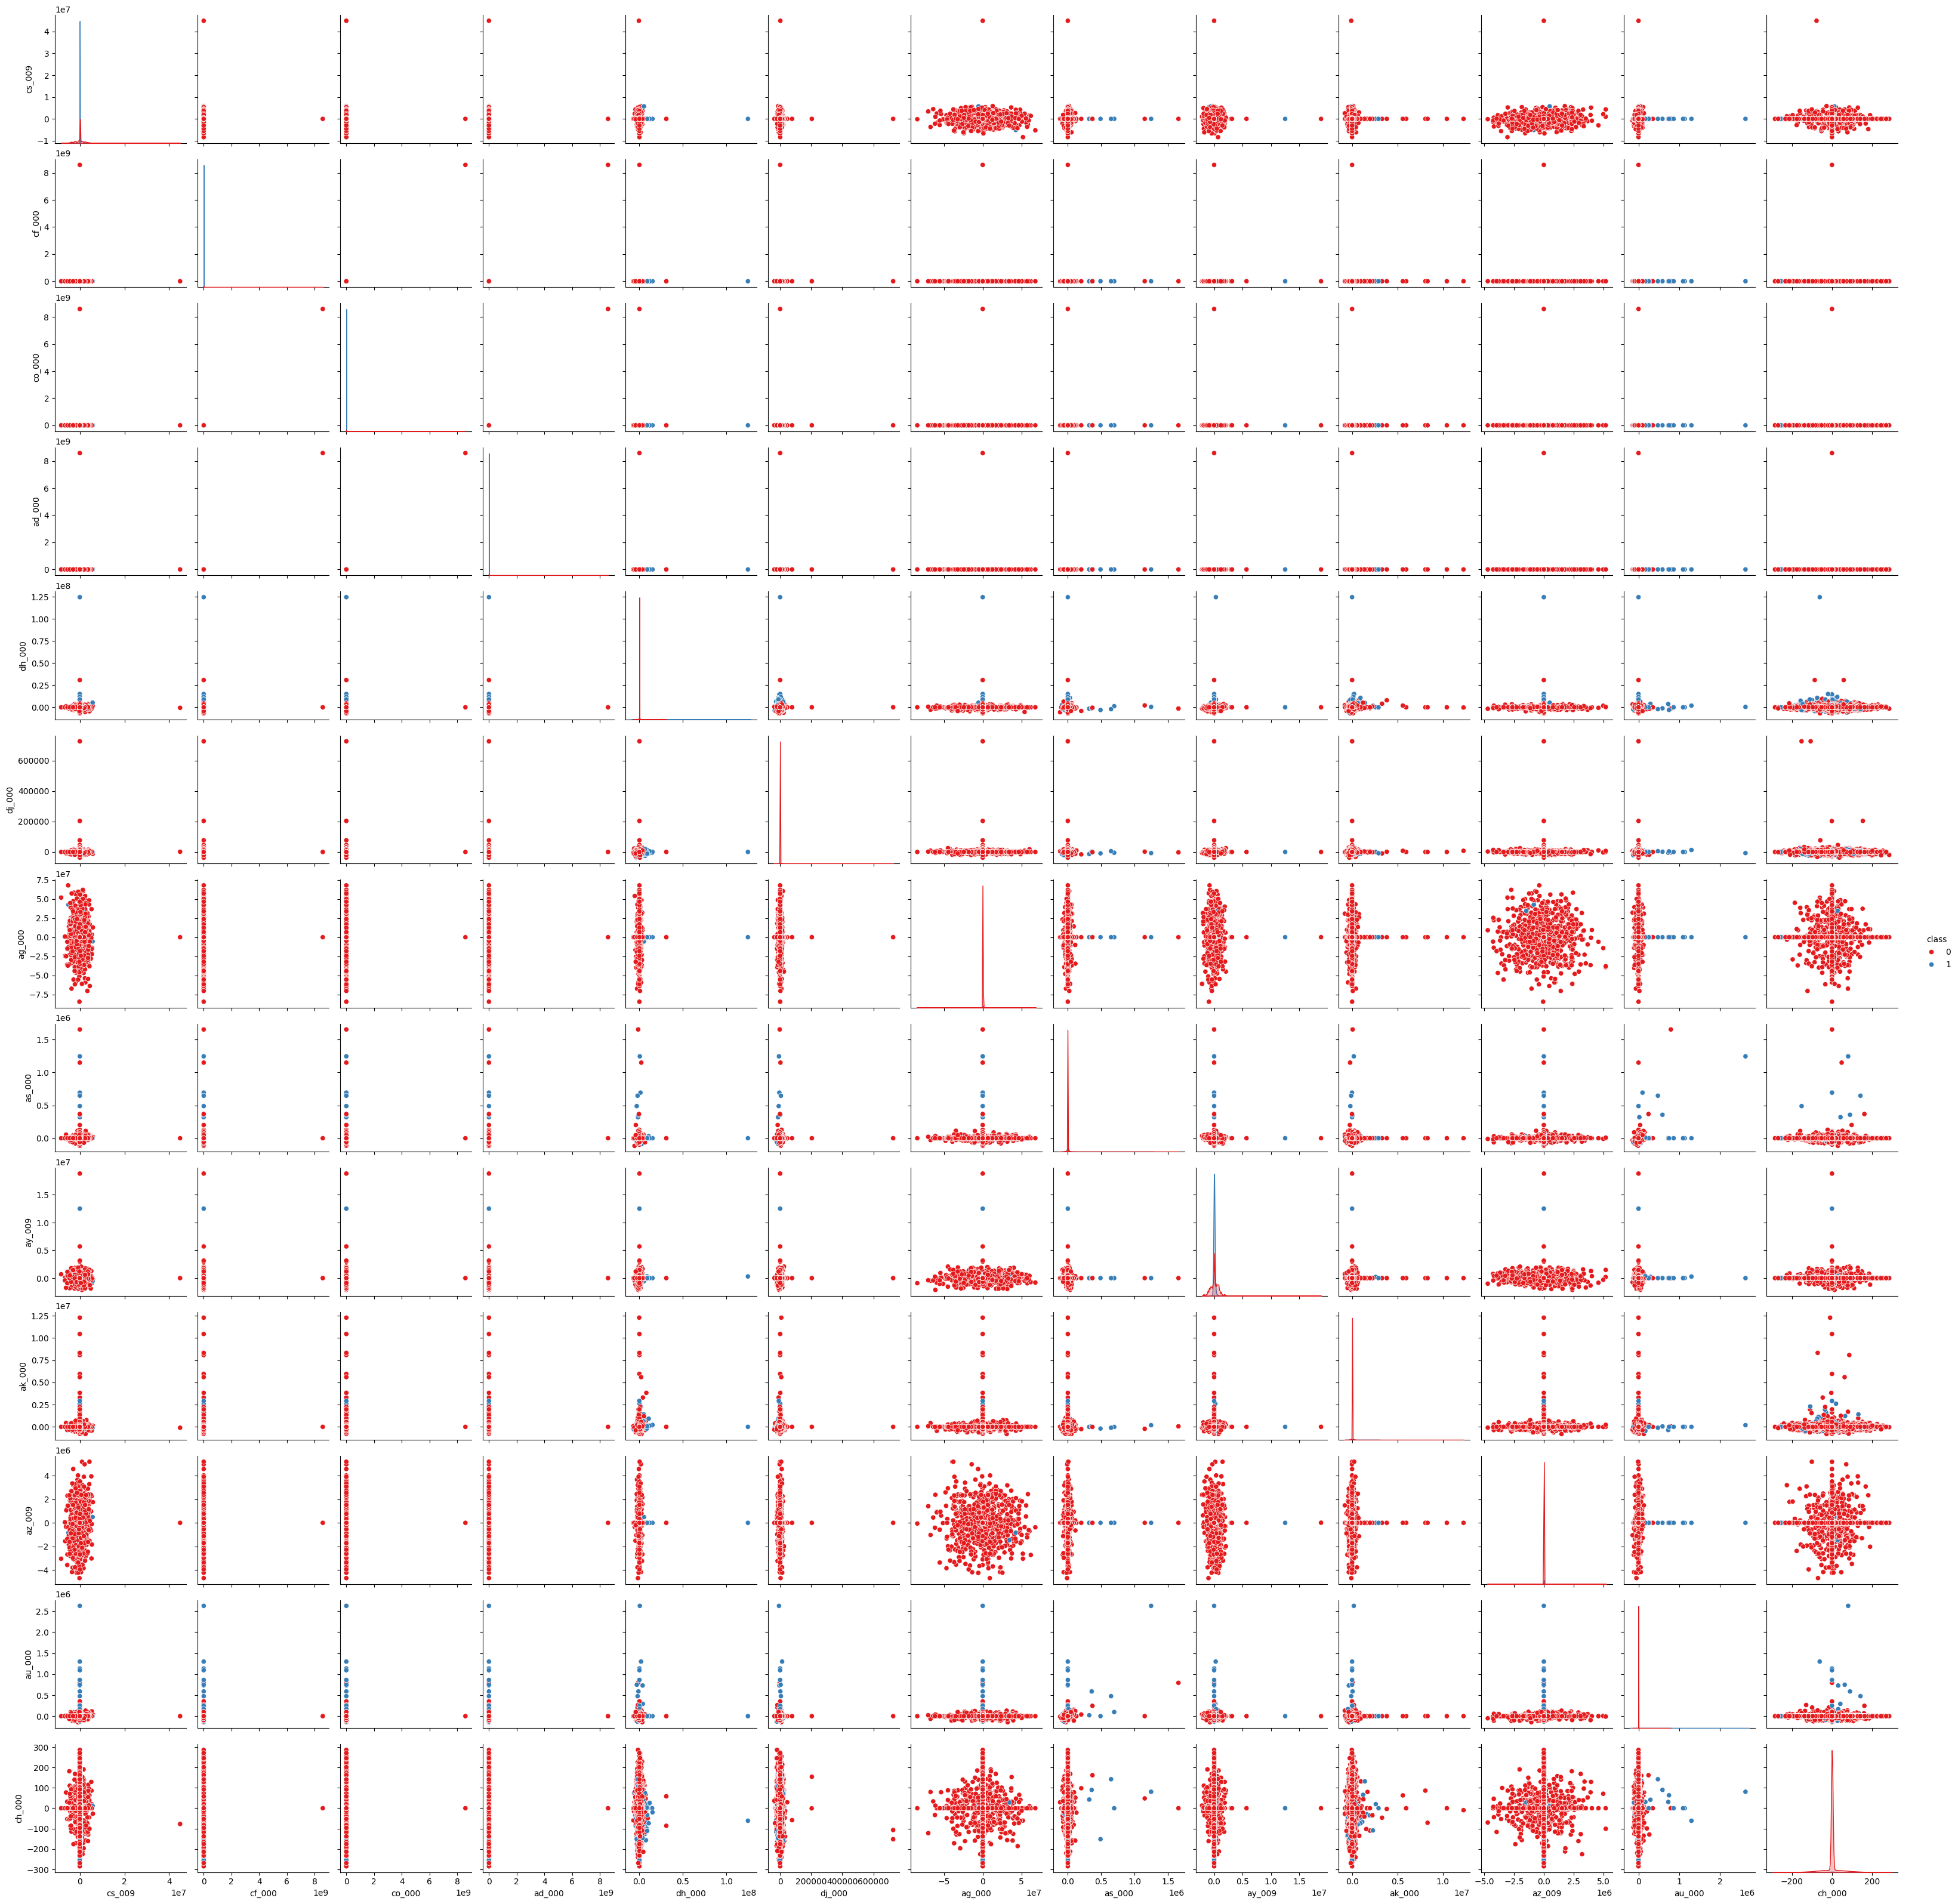

In [16]:
sns.pairplot(data=imputed_train[cv_features + ['class']], hue='class', palette='Set1')

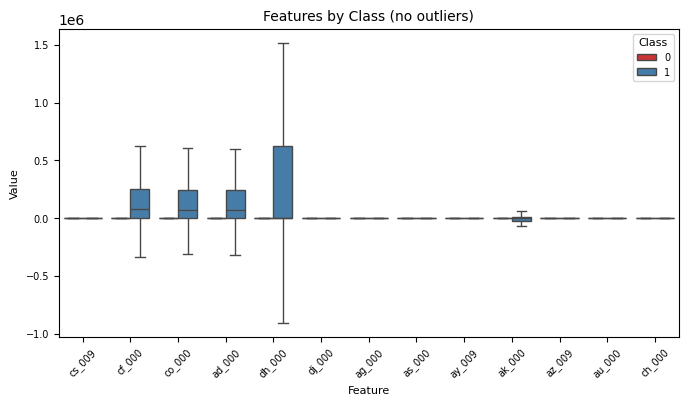

In [17]:
temp = imputed_train[cv_features + ['class']].melt(id_vars='class', 
                                        var_name='feature', 
                                        value_name='value')

plt.figure(figsize=(8, 4))
sns.boxplot(data=temp, x='feature', y='value', hue='class', width=0.8, palette='Set1', showfliers=False)
plt.title(f'Features by Class (no outliers)', fontsize=10)
plt.xlabel('Feature', fontsize=8)
plt.ylabel('Value', fontsize=8)
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.legend(title='Class', fontsize=7, title_fontsize=8)

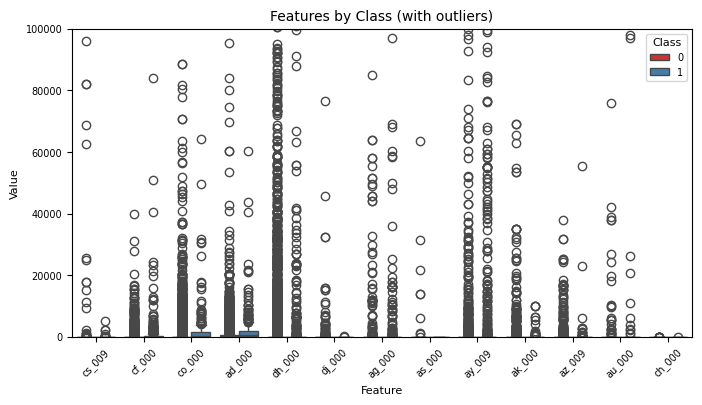

In [18]:
temp = train[cv_features + ['class']].melt(id_vars='class', 
                                        var_name='feature', 
                                        value_name='value')

plt.figure(figsize=(8, 4))
sns.boxplot(data=temp, x='feature', y='value', hue='class', width=0.8, palette='Set1', showfliers=True)
plt.title(f'Features by Class (with outliers)', fontsize=10)
plt.xlabel('Feature', fontsize=8)
plt.ylabel('Value', fontsize=8)
plt.ylim(top=100000, bottom=-3)
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.legend(title='Class', fontsize=7, title_fontsize=8)

Some of the values are so offset by outliers that it is difficult to vie for the veracity of the data. It is also very difficult to differentiate class based off of scatter alone, as there is a lot of overlap between classes.

#### (v) Is this data set imbalanced?

In [19]:
print('post transform num negative (train):', len(train[train['class'] == 0]))
print('post transform num positive (train):', len(train[train['class'] == 1]))
print('percent of positive data:', len(train[train['class'] == 1]) / 60000)

post transform num negative (train): 59000
post transform num positive (train): 1000
percent of positive data: 0.016666666666666666


With only 1.6 percent of the dataset being of the positive class, this dataset is severely imbalanced.

### (c) Train a random forest

Confusion matrix for imbalanced RFC (TRAIN):
 [[59000     0]
 [    1   999]] 

Misclassification Rate: 0.0


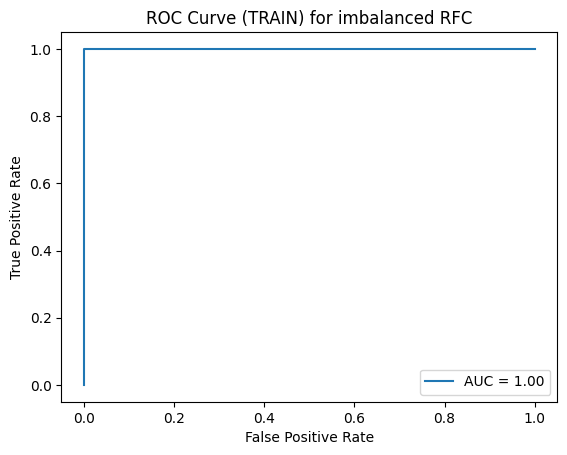

-----------------------------
Confusion matrix for imbalanced RFC (TRAIN):
 [[15605    20]
 [  115   260]] 

Misclassification Rate: 0.0084


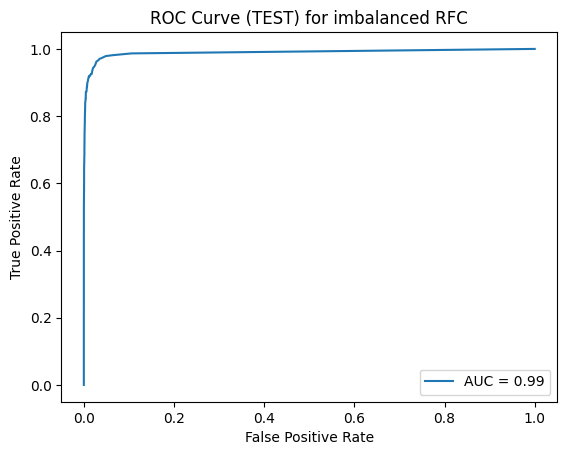

Out of Bag Error: 0.006716666666666704


In [20]:
model1 = RandomForestClassifier(oob_score=True)
model1.fit(imputed_train.drop(columns=['class']), imputed_train['class'])

y_hat = model1.predict(imputed_train.drop(columns=['class']))
y_prob = model1.predict_proba(imputed_train.drop(columns=['class']))[:, 1]
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_train['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_train['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_train['class'], y_hat)
print(f"Confusion matrix for imbalanced RFC (TRAIN):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (TRAIN) for imbalanced RFC")
plt.legend()
plt.show()

print('-----------------------------')

y_hat = model1.predict(imputed_test.drop(columns=['class']))
y_prob = model1.predict_proba(imputed_test.drop(columns=['class']))[:, 1]
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_test['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_test['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_test['class'], y_hat)
print(f"Confusion matrix for imbalanced RFC (TRAIN):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (TEST) for imbalanced RFC")
plt.legend()
plt.show()

print('Out of Bag Error:', str(1 - model1.oob_score_))

The out of bag error is less than that of the testing misclassification error. As the OOB error is the average misclassification error of the out of sample training data, it would be expected to be similar to that of the testing error, but slightly reduced as expected. This is due to the nature of validation, as a part of the training set the sample has similar sample distributions, and is of a more consistent structure. The test set however is completely held out.

### (d) Research class imbalance in random forest

Weighting is a common way to account for and correct for class imbalance in random forest classifiers. By adjusting weights, you penalize the model more harshly for missclassifying the minority class, and by doing so, force the model to learn patterns of the minority class more rigidly.

using class_weight param in sklearns RandomForestClassifier allows you to pass dictionaries for class weightings, one may also pass 'balanced' so that weights are inverselly proportional to class frequencies.

Confusion matrix for balanced RFC (TRAIN):
 [[59000     0]
 [    0  1000]] 

Misclassification Rate: 0.0


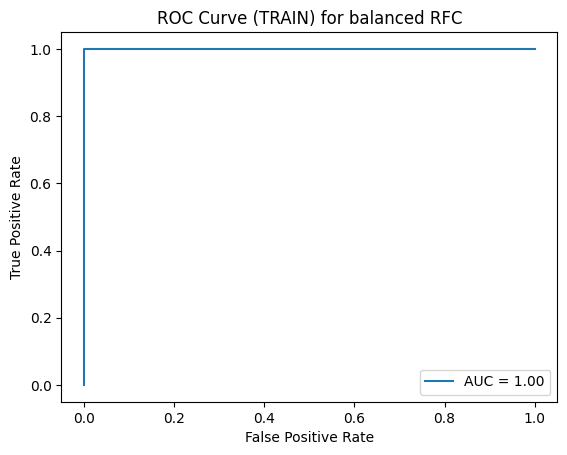

-----------------------------
Confusion matrix for balanced RFC (TRAIN):
 [[15612    13]
 [  188   187]] 

Misclassification Rate: 0.0126


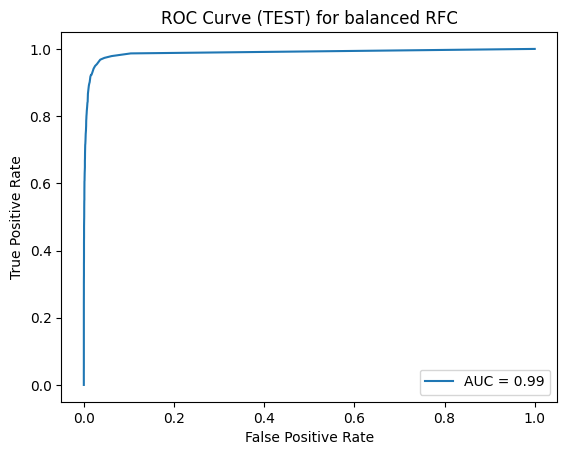

Out of Bag Error: 0.008933333333333349


In [21]:
model2 = RandomForestClassifier(class_weight='balanced',oob_score=True)
model2.fit(imputed_train.drop(columns=['class']), imputed_train['class'])

y_hat = model2.predict(imputed_train.drop(columns=['class']))
y_prob = model2.predict_proba(imputed_train.drop(columns=['class']))[:, 1]
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_train['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_train['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_train['class'], y_hat)
print(f"Confusion matrix for balanced RFC (TRAIN):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (TRAIN) for balanced RFC")
plt.legend()
plt.show()

print('-----------------------------')

y_hat = model2.predict(imputed_test.drop(columns=['class']))
y_prob = model2.predict_proba(imputed_test.drop(columns=['class']))[:, 1]
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_test['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_test['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_test['class'], y_hat)
print(f"Confusion matrix for balanced RFC (TRAIN):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (TEST) for balanced RFC")
plt.legend()
plt.show()

print('Out of Bag Error:', str(1 - model2.oob_score_))

Suprisingly, there was a reported higher number of false negatives. Meaning the model with the adjusted weightings actually underperformed in terms of sensitivity. One would expect the opposite to be true. Further, The model also underperfomed in OOB error and Testing error. This anomoly is likely caused by a misrepresentation of the positive class' features. That is, that the training sample may be incorrecly distributed by class, or  more likely, that the positive class is underrepresented. This causes the model to overfit on noise or skewed representations of the positive class.

The first model is prefered for this reason.

### (e) XGBoost and Model Trees

In [10]:
param_grid = {
    'reg_alpha': [0, 0.01, 0.1, 1, 5, 10]
}

boost = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1
)

grid_search = sci.model_selection.GridSearchCV(
    estimator=boost,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

grid_search.fit(imputed_train.drop(columns=['class']), imputed_train['class'])

print("Optimal alpha:", grid_search.best_params_['reg_alpha'])
print("Optimal model CV accuracy:", grid_search.best_score_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:17:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:17:12] WARN

Optimal alpha: 0.1
Optimal model CV accuracy: 0.9923666666666667


Confusion matrix for balanced RFC (TRAIN):
 [[58938    62]
 [  241   759]] 

Misclassification Rate: 0.005


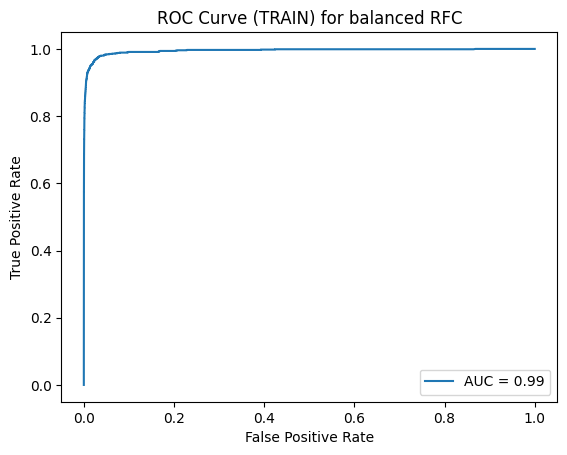

-----------------------------
Confusion matrix for balanced RFC (TEST):
 [[15600    25]
 [  116   259]] 

Misclassification Rate: 0.0088


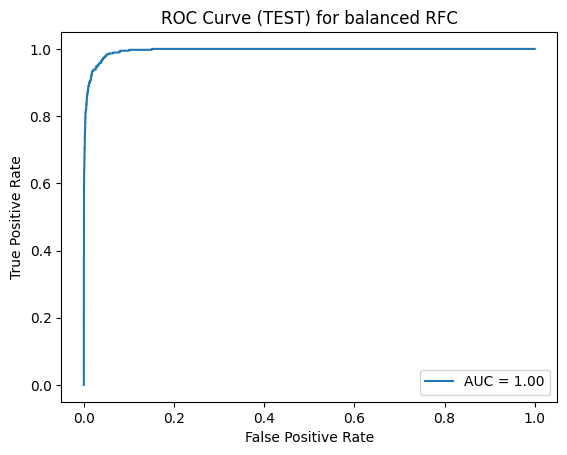

In [11]:
boost = grid_search.best_estimator_

y_hat = boost.predict(imputed_train.drop(columns=['class']))
y_prob = boost.predict_proba(imputed_train.drop(columns=['class']))[:, 1]
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_train['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_train['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_train['class'], y_hat)
print(f"Confusion matrix for balanced RFC (TRAIN):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (TRAIN) for balanced RFC")
plt.legend()
plt.show()

print('-----------------------------')

y_hat = boost.predict(imputed_test.drop(columns=['class']))
y_prob = boost.predict_proba(imputed_test.drop(columns=['class']))[:, 1]
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_test['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_test['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_test['class'], y_hat)
print("Confusion matrix for balanced RFC (TEST):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (TEST) for balanced RFC")
plt.legend()
plt.show()

-----

The problem asks for a model tree which uses LASSO penalized logit as the decision rule. There is no native support for such a tree in sklearn, imodels, or statsmodels. XGBoost does not have native support for any decision rule other than that of the univariate model.

This provides us with a difficult decision. Would a single, global logit do? Or would a tree structure with nested models further decrease sensitivity? Well, as we see from the previous question, it seems as though the data proposes a risk where models overfit to positive data. So nested models may worsen performance in testing. this is due to decreased bias and increased variance.

To find the optimal alpha and feature subset at each node, we must perform a logit after standardizing the data and validate / hyperparam select with cv each time. This tree structure would not need any overarching loss minimization protocols as it is handled by the models themselves, therefore a simple data split and if/else logic will suffice.

The number of models/nodes must be trained/tested for as well. Could be exhaustive.

The Logit requires no null values.

Therefore based off of the constraints posed by the question, I **WILL NOT use XGBoost**, and will instead **create a NODE STRUCTURE VIA BRANCHING OF LASSO penalized LOGIT MODELS** which functionally construct a model tree.

This is the theory, however, the dataset is so large, and with so many hyperparameters being tested, it is far too computationally intensive for my 12 core cpu. would take days to run.

In [ ]:
def build_model_tree(x, y, depth=0, max_depth=3, min_samples=500):
    if depth >= max_depth or len(y) < min_samples: 
        return {
            'depth': depth,
            'model': None,
            'left': None,
            'right': None,
            'samples': len(y),
            'prediction': y.value_counts(normalize=True).idxmax()
        }
    
    pipeline = sci.pipeline.Pipeline([
        ('scaler', sci.preprocessing.StandardScaler()),
        ('model', sci.linear_model.LogisticRegressionCV(max_iter=500, penalty='l1', cv=sci.model_selection.StratifiedKFold(5), solver='liblinear', Cs=[0.1, 1]))
    ])

    pipeline.fit(x, y)
    y_prob = pipeline.predict_proba(x)[:, 1]

    left_mask = y_prob <= 0.5
    right_mask = y_prob > 0.5
    print('no')

    left_tree = build_model_tree(x[left_mask], y[left_mask], depth + 1, max_depth, min_samples)
    right_tree = build_model_tree(x[right_mask], y[right_mask], depth + 1, max_depth, min_samples)

    print('yes')
    return {
        'depth': depth,
        'model': pipeline,
        'left': left_tree,
        'right': right_tree,
        'samples': len(y),
        'prediction': y.value_counts(normalize=True).idxmax()
    }

In [23]:
def predict_model_tree(tree, X):
    if tree is None:
        return np.array([0] * len(X))

    if tree['model'] is None:
        return np.array([tree['prediction']] * len(X))

    probs = tree['model'].predict_proba(X)[:, 1]
    left_mask = probs <= 0.5
    right_mask = probs > 0.5

    preds = np.empty(len(X))
    preds[:] = np.nan

    if tree['left'] is None and tree['right'] is None:
        preds = (probs > 0.5).astype(int)
    else:
        if tree['left'] is not None:
            preds[left_mask] = predict_model_tree(tree['left'], X[left_mask])
        if tree['right'] is not None:
            preds[right_mask] = predict_model_tree(tree['right'], X[right_mask])

    return preds.astype(int)


In [ ]:
tree_model = build_model_tree(x=imputed_train.drop(columns=['class']), y=imputed_train['class'], max_depth=6, min_samples=500)

y_hat = predict_model_tree(tree_model, imputed_train.drop(columns=['class']))
y_prob = y_hat
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_train['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_train['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_train['class'], y_hat)
print(f"Confusion matrix for Model Tree (Train):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (Train) for Model Tree ")
plt.legend()
plt.show()

print('-----------------------------')

y_hat = predict_model_tree(tree_model, imputed_test.drop(columns=['class']))
y_prob = y_hat
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_test['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_test['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_test['class'], y_hat)
print(f"Confusion matrix for Model Tree (Test):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (TEST) for balanced RFC")
plt.legend()
plt.show()

### (f) Use SMOTE to pre-process your data

In [12]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(imputed_train.drop(columns=['class']), imputed_train['class'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:23:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:23:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:23:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:23:55] WARN

Optimal smote alpha: 0.1
Optimal smote model CV accuracy: 0.983093220338983
Confusion matrix for smote xgboost (TRAIN):
 [[57860  1140]
 [  751 58249]] 

Misclassification Rate: 0.016


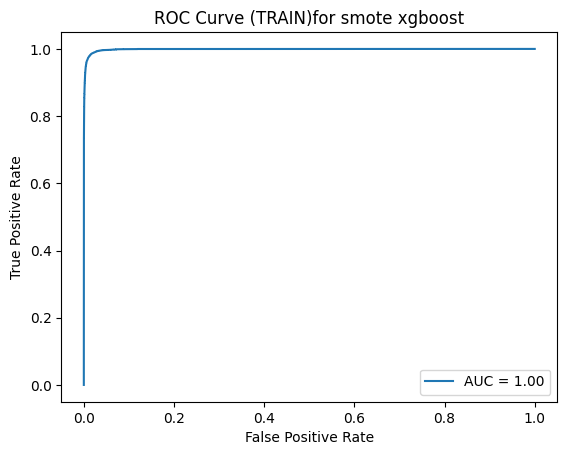

-----------------------------
Confusion matrix for smote xgboost (TEST):
 [[15330   295]
 [   37   338]] 

Misclassification Rate: 0.0208


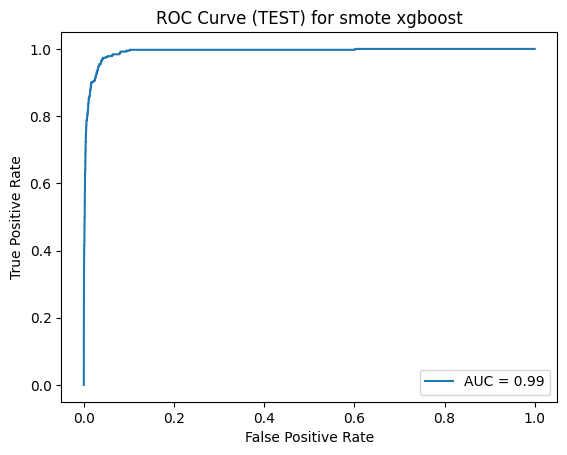

In [14]:
param_grid = {
    'reg_alpha': [0, 0.01, 0.1, 1, 5, 10]
}

boost = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1
)

grid_search = sci.model_selection.GridSearchCV(
    estimator=boost,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

grid_search.fit(x_smote, y_smote)

print("Optimal smote alpha:", grid_search.best_params_['reg_alpha'])
print("Optimal smote model CV accuracy:", grid_search.best_score_)

boost = grid_search.best_estimator_

y_hat = boost.predict(x_smote)
y_prob = boost.predict_proba(x_smote)[:, 1]
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(y_smote, y_prob)
auc = sci.metrics.roc_auc_score(y_smote, y_prob)

cm = sci.metrics.confusion_matrix(y_smote, y_hat)
print(f"Confusion matrix for smote xgboost (TRAIN):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (TRAIN)for smote xgboost")
plt.legend()
plt.show()

print('-----------------------------')

y_hat = boost.predict(imputed_test.drop(columns=['class']))
y_prob = boost.predict_proba(imputed_test.drop(columns=['class']))[:, 1]
fp_rate, tp_rate, thresholds = sci.metrics.roc_curve(imputed_test['class'], y_prob)
auc = sci.metrics.roc_auc_score(imputed_test['class'], y_prob)

cm = sci.metrics.confusion_matrix(imputed_test['class'], y_hat)
print("Confusion matrix for smote xgboost (TEST):\n", cm, '\n')
tn, fp, fn, tp = cm.ravel()

misclassification_rate = round((fp + fn) / (tn + fp + fn + tp), 4)
print('Misclassification Rate:', misclassification_rate)

plt.plot(fp_rate, tp_rate, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (TEST) for smote xgboost")
plt.legend()
plt.show()

The SMOTE model is uncompromisingly a better choice, fixing the class imbalance helped augment the positive class such that the model could learn its general structure much better. In this sense, the sensitivity was much better in the SMOTE case. However, false positives and model missclasifications increased. This is ok for this problem, as in the aps failure description, only the number of false negatives is greatly penalized in terms of score. Therefore in terms of score, the smote xxgboost model greatly outperforms the others. 

## 2. ISLR 6.6.3

### (a)

Training RSS will steadily decrease as LASSO allows to model to increase complexity and fit as s increases

### (b)

Testing RSS will decrease initially and then eventually start increasing due to bias-variance tradeoff

### (c)

Variance will steadily increase as the model becomes more complex

### (d)

Squared bias will steadily decrease as it trades off with variance.

### (e)

Irreducible error will remain constant as it is 'act of God' error, not within the scope of the problem

## 3. ISLR 6.6.5

![Chart](../images/6.6.5.png)

## 4. ISLR 8.4.5

**Majority Polling:** 6 values > .5; Therefore majority polling would indicate the class is red -> 6/10 == .6 > .5

**Average Prob:** the average is .45, therefore the average prob approach would predict green

In [ ]:
listy = [.1,.15,.2,.2,.55,.6,.6,.65,.7,.75]
mean = 0
for item in listy:
    mean += item

mean = mean / 10
print(mean)

0.45


## 5. ISLR 9.7.3

![answer](../images/9.7.3.png)

## References

**Data Imputation:** https://medium.com/@tarangds/a-comprehensive-guide-to-data-imputation-techniques-strategies-and-best-practices-152a10fee543

**Correlation Dataframe:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

**MNAR Approx. methodology:** https://biodatamining.biomedcentral.com/articles/10.1186/s13040-021-00274-7

**sklearn random forest models:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html